In [ ]:
import sympy as sp
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from scipy.misc import derivative
from scipy.integrate import odeint
from sklearn.metrics import mean_squared_error
import math
sp.init_printing()
%matplotlib inline

# **Dos tanques en serie**

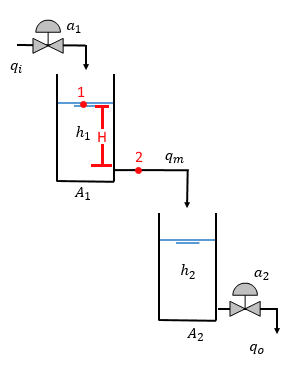


# **1. Descripción de sistema dinámico**

**1.1. Modelo matemático**

Consideraciones:

* La presión manométrica entre los puntos 1 y 2 es cero (ambos tienen presión atmosférica).
* m es la masa de las partículas de fluido entre el punto 1 y 2.
* v es la velocidad de salida de la partícula entre el punto 1 y 2.

Por conservación de energia

$\frac{1}{2} m v^2 = mgH$

$v = \sqrt{2gH}$

El flujo de salida del tanque para el caso de una sección transversal S es:

$Q = Sv = S\sqrt{2gH}$

$Q = S\sqrt{2g} \sqrt{H}$ ----> $K = S\sqrt{2g}$

$Q = K \sqrt{H}$ 
donde la altura es nuestra variable dinámica

**Flujo por una válvula**
De manera general el flujo que pasa por una válvula en estado estacionario es

$Q_{v} = K_{v} A_{s} \sqrt{\Delta{}P}$

* Qv: Flujo a través de la valvula
* Kv: Constante
* A: Área de paso
* $\Delta{}P$: Presión diferecial a través de la válvula: P1-P2

***Flujo por una válvula***
El flujo que pasa por la válvula es proporcional al área de abertura si la presión diferencial es constante. asumamos una válvula inteligente donde se tiene una relacón lineal entre el flujo y la abertura.

$Q_{s} = S a \sqrt{2gH}$

$Q_{s} = K a \sqrt{H}$



***Tanque 1***

Teniendo en cuenta que nuestra variable es la altura, su relación en el tiempo está dada por la entrada del tanque menos la salida del tanque (conservación de masas)

$A_{1} \frac{dh_{1}}{dt} = q_{i}-q_{m}$

Suponiendo un flujo de entrada constante qi lineal. Además teniendo en cuenta que el cualdal de salida de qm depende de la altura h1

$A_{1} \frac{dh_{1}}{dt} = K_{1} a_{1}- K_{2} \sqrt{h_{1}}$  (Ec. 1)

***Tanque 2***

Aplicando los mismos conceptos y teniendo en cuenta la ecuacón de la válvula

$A_{2} \frac{dh_{2}}{dt} = q_{m}-q_{0}$

$A_{2} \frac{dh_{2}}{dt} = K_{2} \sqrt{h_{1}} - K_{3} a_{2} \sqrt{h_{2}}$  (Ec. 2)


donde la Ec 1 y 2 son las ecuaciones de estados del sistema

**2. Linealización del sistema en su punto de equilibrio**

Muchos componentes y actuadores poseen características no lineales y la eficacia de su acción requiere mucho de que se mantengan en el punto de operación donde actúan aproximadamente de manera lineal, el cuál puede ser un intervalo muy limitado. Por ello, linealizar es expresar una función o ecuación diferencial no lineal con una versión lineal aproximada, sólo válida en un intervalo muy pequeño de valores de la variable independiente. Algo así como expresar una función cuadrática mediante la fórmula matemática de una línea recta. 

Para este ejemplo se linealiza en el punto de equilibrio por facilidad de cálculos para hacer las derivadas del sistema iguales a cero y así poder hallar los parámetros del sistema para proceder a la aproximación de este en su estado lineal.


Si h1 y h2 están en equilibrio, las derivadas son iguales a cero

$A_{1} (0) = K_{1} a_{1}- K_{2} \sqrt{h_{1}}$  (Ec. 1)

$K_{1} a_{1}= K_{2} \sqrt{h_{1s}}$ 

$h_{1s} = (\frac{K_{1} a_{1}}{k_{2}})^2 $  (Altura 1 en estado estacionario)


$A_{2} (0) = K_{2} \sqrt{h_{1}} - K_{3} a_{2} \sqrt{h_{2}}$  (Ec. 2)

$K_{2} \sqrt{h_{1s}} =  K_{3} a_{2} \sqrt{h_{2s}}$ 

$h_{2s} = \frac{K_{2}^2 h_{1s}}{(K_{3}a_{2})^2}$ (Altura 2 en estado estacionario)

***Linealización por series de taylor***
Las series de Taylor son la expansión de una función  f(x) en términos del valor de esa función en un punto xo en particular, alrededor de ese punto y en términos de las derivadas de la función evaluadas en ese punto:

$F(x) = F(x*)+ \Delta{}F(x*)\Delta{}x$

# ***Suponindo a2 constante y a1 variable***

**1. Tanque 1**

h1s, 2s, a1s y a2s son las variables en equilibrio

$A_{1} \frac{dh_{1}}{dt} = K_{1} a_{1}- K_{2} \sqrt{h_{1}}$  (Ec. 1)

$A_{1} \frac{dh_{1}}{dt} ≈ F(a_{1},h_{1})$

$F(a_{1},h_{1}) ≈ F(a_{1s}h_{1s})+\frac{∂F}{∂a_{1}}|_{a_{1s} h_{1s}} (a_{1}-a_{1s}) + \frac{∂F}{∂h_{1}}|_{a_{1s} h_{1s}} (h_{1}-h_{1s})$ 

$F(a_{1},h_{1}) ≈ K_{1} a_{1s} - K_{2} \sqrt{h_{1s}} + K_{1} \Delta{} a_{1} - \frac{K_{2}}{2\sqrt{h_{1s}}} \Delta h_{1}$ 

$\Delta{} h_{1} = h_{1}-h_{1s}$

$\Delta{} a_{1} = a_{1}-a_{1s}$

Teniendo en cuenta que

$F(a_{1},h_{1}) = A_{1}\frac{dh_{1}}{dt}$ 

$A_{1}\frac{dh_{1}}{dt} = A_{1}\frac{dh_{1}}{dt}|_{a_{1s}h_{1s}} + K_{1} \Delta{} a_{1} - \frac{K_{2}}{2\sqrt{h_{1s}}} \Delta h_{1}$ 

$A_{1}\frac{dh_{1}}{dt} - A_{1}\frac{dh_{1}}{dt}|_{a_{1s}h_{1s}} =   K_{1} \Delta{} a_{1} - \frac{K_{2}}{2\sqrt{h_{1s}}} \Delta h_{1}$ 

$A_{1}\frac{d \Delta{}h_{1}}{dt} =   K_{1} \Delta{} a_{1} - \frac{K_{2}}{2\sqrt{h_{1s}}} \Delta h_{1}$ (Ya es un sistema lineal)

**Laplace**

$A_{1} S \Delta{}h_{1}(S) =   K_{1} \Delta{} a_{1}(S) - \frac{K_{2}}{2\sqrt{h_{1s}}} \Delta h_{1}$ 

$ \Delta{} h_{1} (S) (A_{1} + \frac{K_{2}}{2\sqrt{h_{1s}}}) =  K_{1} \Delta{} a_{1}(S)$

$ G_{1}S = \frac{\Delta{}h_{1}(S)}{\Delta{}a_{1}(S)} = \frac{K_{1}}{A_{1}S + \frac{K_{2}}{2\sqrt{h_{1s}}}} $


**1. Tanque 2**

$A_{2} \frac{dh_{2}}{dt} = K_{2} \sqrt{h_{1}} - K_{3} a_{2} \sqrt{h_{2}}$   (Ec. 2)

$A_{2} \frac{dh_{2}}{dt} ≈ F(h_{1},h_{2})$

$F(h_{1},h_{2}) ≈ F(h_{1s}h_{2s})+\frac{∂F}{∂h_{1}}|_{h_{1s} h_{2s}} (h_{1}-h_{1s}) + \frac{∂F}{∂h_{2}}|_{h_{1s} h_{2s}} (h_{2}-h_{2s})$ 

$F(h_{1},h_{2}) ≈ K_{2}\sqrt{h_{1s}}-K_{3}a_{2}\sqrt{h_{2s}}+\frac{K_{2}}{2\sqrt{h_{1s}}}\Delta{}h_{1} - \frac{K_{3}a_{2}}{2\sqrt{h_{2s}}}\Delta{}h_{2}$ 

Teniendo en cuenta que

$F(h_{1},h_{2}) = A_{2}\frac{dh_{2}}{dt}$ 

$A_{2}\frac{dh_{2}}{dt} - A_{2}\frac{dh_{2}}{dt} |_{h_{1s},h_{2s}} = \frac{K_{2}}{2\sqrt{h_{1s}}}\Delta{}h_{1} - \frac{K_{3}a_{2}}{2\sqrt{h_{2s}}}\Delta{}h_{2}$ 

$A_{2}\frac{d \Delta{}h_{2}}{dt} = \frac{K_{2}}{2\sqrt{h_{1s}}}\Delta{}h_{1} - \frac{K_{3}a_{2}}{2\sqrt{h_{2s}}}\Delta{}h_{2}$ 

**Laplace**

$A_{2}S\Delta{}h_{2}(S) = \frac{K_{2}}{2\sqrt{h_{1s}}}\Delta{}h_{1}(S) - \frac{K_{3}a_{2}}{2\sqrt{h_{2s}}}\Delta{}h_{2}(S)$ 

$A_{2}S\Delta{}h_{2}(S) + \frac{K_{3}a_{2}}{2\sqrt{h_{2s}}}\Delta{}h_{2}(S) = \frac{K_{2}}{2\sqrt{h_{1s}}}\Delta{}h_{1}(S)$ 

$\Delta{}h_{2}(S) (A_{2}S + \frac{K_{3}a_{2}}{2\sqrt{h_{2s}}}) = \frac{K_{2}}{2\sqrt{h_{1s}}}\Delta{}h_{1}(S)$

teniendo en cuenta que

$ G_{1}S = \frac{\Delta{}h_{1}(S)}{\Delta{}a_{1}(S)} = \frac{K_{1}}{A_{1}S + \frac{K_{2}}{2\sqrt{h_{1s}}}} $

$\Delta{}h_{2}(S) (A_{2}S + \frac{K_{3}a_{2}}{2\sqrt{h_{2s}}}) = \frac{K_{2}}{2\sqrt{h_{1s}}} \frac{K_{1}\Delta{}a_{1}(S)}{A_{1}S + \frac{K_{2}}{2\sqrt{h_{1s}}}}$

$G_{2}(S) = \frac{\frac{K_{2} K_{1}}{2\sqrt{h_{1s}}}} {(A_{1}S+\frac{K_{2}}{2sqrt{h_{1s}}}) (A_{2}S + \frac{K_{3}a_{2}}{2\sqrt{h_{2s}}})}$ (Función de transferencia de segundo orden)








**Espacio de estados**

$A_{1}\frac{d \Delta{}h_{1}}{dt} =   K_{1} \Delta{} a_{1} - \frac{K_{2}}{2\sqrt{h_{1s}}} \Delta h_{1}$ 

$A_{2}\frac{d \Delta{}h_{2}}{dt} = \frac{K_{2}}{2\sqrt{h_{1s}}}\Delta{}h_{1} - \frac{K_{3}a_{2}}{2\sqrt{h_{2s}}}\Delta{}h_{2}$  


\begin{equation}
\boldsymbol{\left[\begin{array}{lll}
\Delta{} \dot{h_{1}}  \\
\Delta{} \dot{h_{2}}  \\
\end{array}\right]}=\left[\begin{array}{lll}
 -\frac{K_{2}}{2A_{1}\sqrt{h_{1s}}} && 0 \\
 \frac{K_{2}}{2A_{2}\sqrt{h_{1s}}} && - \frac{K_{3}a_{2}}{2 A_{2}\sqrt{h_{2s}}}\\
\end{array}\right] \left[\begin{array}{lll}
 \Delta{} h_{1} \\
  \Delta{} h_{2}\\
\end{array}\right] + \left[\begin{array}{lll}
 \frac{K_{1}}{A_{1}} \\
   0 \\
\end{array}\right] \Delta{}a_{1}
\end{equation}

\begin{equation}
\boldsymbol{y}=\left[\begin{array}{lll}
0 && 1  \\
\end{array}\right] \left[\begin{array}{lll}
 \Delta{} h_{1} \\
  \Delta{} h_{2}\\
\end{array}\right]
\end{equation}

Suponiendo que solo me interesa el delta h2

con esta se llega a la misma expansión de series de taylor: la primera derivada de series de taylor es la jacoviana

$F(h_{1},h_{2},a_{1})=\frac{1}{A_{1}}(K_{1}a_{1}-K_{2}\sqrt{h_{1}})$

$F(h_{1},h_{2},a_{1})=\frac{1}{A_{2}}(K_{2}\sqrt{h_{1}}-K_{3}a_{2}\sqrt{h_{2}})$

\begin{equation}
\boldsymbol{\left[\begin{array}{lll}
\Delta{} \dot{h_{1}}  \\
\Delta{} \dot{h_{2}}  \\
\end{array}\right]}=\left[\begin{array}{lll}
 \frac{∂F1}{∂\Delta{}h_{1}} && \frac{∂F1}{∂\Delta{}h_{2}} \\
 \frac{∂F2}{∂\Delta{}h_{1}} && \frac{∂F2}{∂\Delta{}h_{2}}\\
\end{array}\right] \left[\begin{array}{lll}
 \Delta{} h_{1} \\
  \Delta{} h_{2}\\
\end{array}\right] + \left[\begin{array}{lll}
 \frac{∂F1}{∂\Delta{}a_{1}} \\
  \frac{∂F2}{∂\Delta{}a_{1}} \\
\end{array}\right] \Delta{}a_{1}
\end{equation}

**Condiciones iniciaes**



*   $K_{1}=0.04 \frac{m^3}{s}$

*   $K_{2}=0.03 \frac{m^\frac{5}{2}}{s}$
* $K_{3}=0.055 \frac{m^\frac{5}{2}}{s}$

* $a_{1} = 0.5$

* $a_{2}=0.45$

* $A_{1}=1 m^2$

* $A_{2}=1.5 m^2$



**1.2. Linealización con numpy**

$\frac{dh_{1}}{dt} = \frac{K_{1} a_{1}- K_{2} \sqrt{h_{1}}}{A_{1}}$  (Ec. 1)

$\frac{dh_{2}}{dt} = \frac{K_{2} \sqrt{h_{1}} - K_{3} a_{2} \sqrt{h_{2}}}{A_{2} }$  (Ec. 2)

$h_{1s} = (\frac{K_{1} a_{1}}{k_{2}})^2 $  (Altura 1 en estado estacionario)


$h_{2s} = \frac{K_{2}^2 h_{1s}}{(K_{3}a_{2})^2}$ (Altura 2 en estado estacionario)

In [ ]:
# Solucion analitica con Python - para encontrar las derivadas parciales de los espacios de estados
sp.init_printing()
k1=0.04
k2=0.03
k3=0.055
a1s=0.5
a2=0.45 #Suponemos a2 constante
A1=1
A2=1.5
# definicion de simbolos
h1,h2,a1,a2 = sp.symbols(['h1','h2','a1','a2'])
# definir ecuacion
dh1dt = (k1*a1-k2*h1**(1/2))/(A1)
dh2dt = (k2*h1**(1/2)-k3*a2*h2**(1/2))/(A2)

print(" dh1: ")
print("dh1dt,h1: ",sp.diff(dh1dt,h1))
print("dh1dt,a1: ",sp.diff(dh1dt,a1))

print("\n","dh2: ")
print("dh2dt,h2: ",sp.diff(dh2dt,h2))
print("dh2dt,a1: ",sp.diff(dh2dt,a1))

 dh1: 
dh1dt,h1:  -0.015*h1**(-0.5)
dh1dt,a1:  0.0400000000000000

 dh2: 
dh2dt,h2:  -0.0183333333333333*a2*h2**(-0.5)
dh2dt,a1:  0


**Jacobiana**



\begin{equation}
\boldsymbol{\left[\begin{array}{lll}
\Delta{} \dot{h_{1}}  \\
\Delta{} \dot{h_{2}}  \\
\end{array}\right]}=\left[\begin{array}{lll}
 \frac{∂F1}{∂\Delta{}h_{1}} && \frac{∂F1}{∂\Delta{}h_{2}} \\
 \frac{∂F2}{∂\Delta{}h_{1}} && \frac{∂F2}{∂\Delta{}h_{2}}\\
\end{array}\right] \left[\begin{array}{lll}
 \Delta{} h_{1} \\
  \Delta{} h_{2}\\
\end{array}\right] + \left[\begin{array}{lll}
 \frac{∂F1}{∂\Delta{}a_{1}} \\
  \frac{∂F2}{∂\Delta{}a_{1}} \\
\end{array}\right] \Delta{}a_{1}
\end{equation}

\begin{equation}
\boldsymbol{\left[\begin{array}{lll}
\Delta{} \dot{h_{1}}  \\
\Delta{} \dot{h_{2}}  \\
\end{array}\right]}=\left[\begin{array}{lll}
 -\frac{K_{2}}{2A_{1}\sqrt{h_{1s}}} && 0 \\
 \frac{K_{2}}{2A_{2}\sqrt{h_{1s}}} && - \frac{K_{3}a_{2}}{2 A_{2}\sqrt{h_{2s}}}\\
\end{array}\right] \left[\begin{array}{lll}
 \Delta{} h_{1} \\
  \Delta{} h_{2}\\
\end{array}\right] + \left[\begin{array}{lll}
 \frac{K_{1}}{A_{1}} \\
   0 \\
\end{array}\right] \Delta{}a_{1}
\end{equation}

$A*x+Bu$

In [ ]:
a1=a1s
a2=0.45
h1=((k1*a1)/(k2))**2
h2=(((k2**2)*h1)/((k3*a2)**2))

def pd_h11(h1):
    dh1dt = (k1*a1-k2*h1**(1/2))/(A1)
    return dh1dt
def pd_h12(h2):
    dh1dt = (k1*a1-k2*h1**(1/2))/(A1)
    return dh2dt
def pd_a1(a1):
    dh1dt = (k1*a1-k2*h1**(1/2))/(A1)
    return dh1dt

def pd_h21(h1):
    dh2dt = (k2*h1**(1/2)-k3*a2*h2**(1/2))/(A2)
    return dh2dt
def pd_h22(h2):
    dh2dt = (k2*h1**(1/2)-k3*a2*h2**(1/2))/(A2)
    return dh2dt
def pd_a2(a1):
    dh2dt = (k2*h1**(1/2)-k3*a2*h2**(1/2))/(A2)
    return dh2dt

print('Valores para la matriz A - derivadas respecto h1 y h2')
A11=derivative(pd_h11,h1,dx=1e-4)
A12=derivative(pd_h12,h2,dx=1e-4)
A21=derivative(pd_h21,h1,dx=1e-4)
A22=derivative(pd_h22,h2,dx=1e-4)
A=[[A11,A12],[A21,A22]]
print(A)

print('\n','Valores para la matriz B - derivadas respecto a1')
B11=derivative(pd_a1,a1,dx=1e-4)
B12=derivative(pd_a2,a1,dx=1e-4)
B=[[B11],[B12]]
print(B)

print('\n','Derivadas parciales exactas para A')
AR11=-(k2)/(2*A1*h1**(1/2))
AR12=0
AR21=k2/(2*A2*h1**(1/2))
AR22=-k3*a2/(2*A2*h2**(1/2))
AR=[[AR11,AR12],[AR21,AR22]]
print(AR)

print('\n','Derivadas parciales exactas para B')
BR11=k1/A1
BR12=0
BR=[[BR11],[BR12]]
print(BR)

Valores para la matriz A - derivadas respecto h1 y h2
[[-0.022500000142391258, 0], [0.015000000094927505, -0.010209375029927859]]

 Valores para la matriz B - derivadas respecto a1
[[0.04000000000000531], [0.0]]

 Derivadas parciales exactas para A
[[-0.022499999999999996, 0], [0.015, -0.010209374999999998]]

 Derivadas parciales exactas para B
[[0.04], [0]]


La linealización nos permite encontrar la estabilidad local del punto de equilibrio para este sistema sistema de ecuaciones diferenciales no lineales.
Cualquiera de los dos métodos nos proporciona un ajuste cercano al modelo. Sin embargo, se debe tener en cuenta que la linealización tiene un mejor ajuste en los puntos cercanos al punto de linealización, cuando se aleja, los valores se generan con un mayor error.

**1.3. Comparación de respuesta escalón**

Tomamos las derivadas parciales aproximadas

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


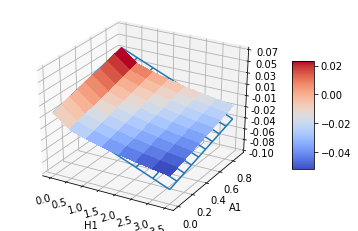

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Generar datos
H1 = np.arange(0, 4, 0.5) #Variamos la altura
Av1 = np.arange(0, 1, 0.1) #Es una valula donde su apertura es de 0-1
H1, Av1 = np.meshgrid(H1, Av1)
DH1DT = (k1*Av1-k2*(H1**(1/2)))/(A1)
LIN = -0.022500000142391258*H1 + 0.04*Av1

# Graficar superficie
surf = ax.plot_wireframe(H1, Av1, LIN)
surf = ax.plot_surface(H1, Av1, DH1DT, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Configurar eje z
ax.set_zlim(-0.10, 0.07)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.xticks(rotation=15)


# Agregar barra de colores
fig.colorbar(surf, shrink=0.5, aspect=5)

# Agregar etiquetas
plt.xlabel('H1')
plt.ylabel('A1')

plt.show()

In [ ]:
print(np.linalg.eig(AR)[0])
C = [[1.0,0.0],[0.0,1.0]]
D = [[0.0],[0.0]]
sys = signal.StateSpace(AR,B,C,D)
t,y = signal.step(sys)

[-0.01020937 -0.0225    ]


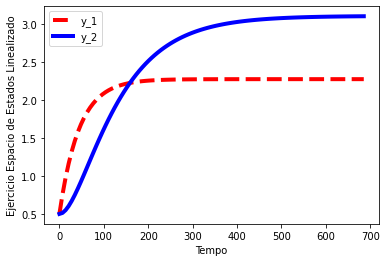

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(t,y[:,0]+0.5,'r--',linewidth=4)
plt.plot(t,y[:,1]+0.5,'b-',linewidth=4)
plt.legend(['y_1','y_2'],loc='best')
plt.ylabel('Ejercicio Espacio de Estados Linealizado')
plt.xlabel('Tempo')
plt.show()

La linealización nos permite generar un aproximado para la planta de llenado. Sin embargo, se generan ciertos problemas de aproximación. En el punto que linealizamos hay un mejor ajuste, mientras que cuando nos vamos alejando de este, perdemos aproximación. Por ello, es mejor utilizar varias funciones de linealización por rangos con el fin de obtener un mejor ajuste.

La linealización se aleja del sistema no linealizado, se generan grandes porcentajes de error. Podría generarse un mejor ajuste linealizando en otro punto.

**1.4. Determinar los polos del sistema.**

Los polos de una función de transferencia son las raices de la ecuación característica, controlan directamente la respuesta transitoria del sistema y permiten identificar de primera instancia el comportamiento y determinar así su tendencia y comportamiento.


$ G_{1}S = \frac{\Delta{}h_{1}(S)}{\Delta{}a_{1}(S)} = \frac{K_{1}}{A_{1}S + \frac{K_{2}}{2\sqrt{h_{1s}}}} $


$G_{2}(S) = \frac{\frac{K_{2} K_{1}}{2\sqrt{h_{1s}}}} {(A_{1}S+\frac{K_{2}}{2sqrt{h_{1s}}}) (A_{2}S + \frac{K_{3}a_{2}}{2 \sqrt{h_{2s}}})}$ (Función de transferencia de segundo orden)

In [ ]:
#Función de transferencia grado 2
from scipy.signal import ss2tf
ss2tf(AR, B, C, D) 

(array([[0.0000000e+00, 4.0000000e-02, 4.0837500e-04],
        [0.0000000e+00, 6.9388939e-18, 6.0000000e-04]]),
 array([1.00000000e+00, 3.27093750e-02, 2.29710937e-04]))

In [ ]:
#Raiz función de transferencia 2
from sympy import *
  
s, y = symbols('s y') 
gfg_exp =  s**2+0.03271*s+0.00023
    
intr = solve(gfg_exp, s) 
  
print("Los polos del sistema son: ", intr)

Los polos del sistema son:  [-0.0224775831966581, -0.0102324168033419]


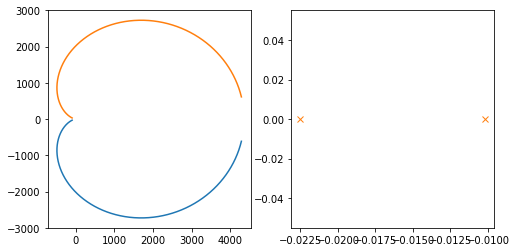

In [ ]:
sys2 = signal.lti([1],[1.00000000e+00, 3.27093750e-02, 2.29710937e-04])
w, H = signal.freqresp(sys2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.plot(H.real, H.imag)
ax1.plot(H.real, -H.imag)
ax2.plot(sys2.zeros.real, sys2.zeros.imag, 'o')
ax2.plot(sys2.poles.real, sys2.poles.imag, 'x')

Como nuestras raices son negativas, nuestro sistema es exponencialmente decreciente y por lo tanto puede controlarse. Además no tenemos componentes imaginarios

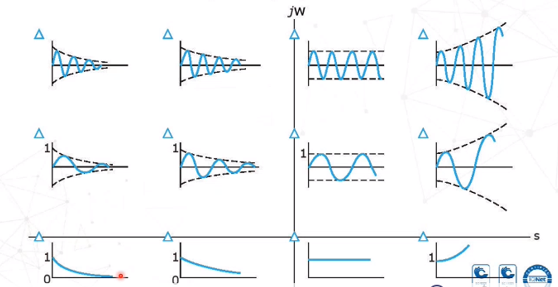

**1.5. Discretización de sistema lineal**

La transformada z se utiliza para modelar la relaciones entre las secuencias de entrada y de salida de un procesador de tiempo discreto. Nos permite modelar sistemas discretos en función de la variable Z.

In [ ]:
from scipy import signal
#linealizamos con los ceros encontrados anteriormente
#Strans = signal.ZerosPolesGain([[ 0.0, 0.04, 0.0004084]], [1.00000e+00, 3.27100e-02, 2.29725e-04], 1) 
Strans = signal.ZerosPolesGain([[ 0.       , 0.       , 0.0006   ]], [1.00000e+00, 3.27100e-02, 2.29725e-04], 1) 
print(Strans)

ZerosPolesGainContinuous(
array([[0.    , 0.    , 0.0006]]),
array([1.00000e+00, 3.27100e-02, 2.29725e-04]),
1,
dt: None
)


In [ ]:
#Definimos un muestreo de 0.2 
dt = 0.2
discrf = Strans.to_discrete(dt)
print("Con t=0.2: ", discrf)

Con t=0.2:  ZerosPolesGainDiscrete(
array([1.00005157, 1.00000001, 0.99937502]),
array([1.22140276, 1.00656345, 1.00004595]),
1.0,
dt: 0.2
)


Utilizando un tiempo de muestreo de 0.2 la función de transferencia discreta está dada por la siguiente función

$H(z)=\frac{z^2 + z + 1}{1.221 z^2 + 1.0065 z + 1}$

In [ ]:
t = np.linspace(0,4,1000)
tdis, yd = signal.dstep(discrf, t=t)
_, yc = signal.step(Strans,T=t)

Text(0, 0.5, 'Amplitud')

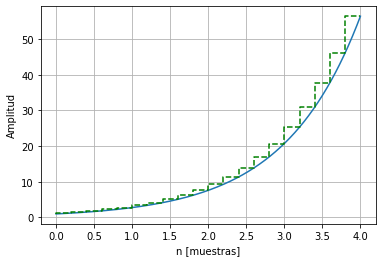

In [ ]:
plt.plot(t, yc)
plt.step(tdis, np.squeeze(yd),'--g')
plt.grid()
plt.xlabel('n [muestras]')
plt.ylabel('Amplitud')

Teniendo en cuenta el comportamiento de la gráfica, el tiempo de muestreo de 0.2 es un buen ajuste, teniendo en cuenta que no es una pendiente muy pronunciada. Sin embargo, es bueno hace análisis entre el error esperado en un proceso y la aproximación brindada por la función escalon.

# **2. Minimos cuadrados para la estimación de parámetros**

**2.1. Datos de yk y uk. Se puede usar una entrada de tipo impulso, escalón o escalones de diferentes amplitudes.**

$$
y=\left[\begin{array}{ll}
y_{3}\\
y_{4}\\ 
 .  \\ 
y_{N}\\ 
\end{array}\right], 
T=\left[\begin{array}{ll}
y_{3} & y_{4} & u_{2} \\
y_{4} & y_{2} & u_{3} \\ 
 .    &  .     & .  \\ 
y_{N-1}&y_{N-2}&u_{N-1}\\ 
\end{array}\right],
𝞱=\left[\begin{array}{l}
θ_{1}\\
θ_{2}\\ 
θ_{3}
\end{array}\right]
$$

donde $u_{k}=a1$ y 
$y=h_{2}$

Se emplea la aproximacion por mínimos cuadrados para hallar los parametros del sistema, con entrada tipo escalón, se generan los datos para hallar los parametros a1, a2, b0 del sistema de segundo orden de la forma

Teniendo en cuenta la entrada a1, se tiene la siguiente gráfica de estimación

$$y_{k} = θ_{1}y_{k-1}+θ_{2}y_{k-2}+θu_{k-1}$$

donde K=3 y 4

$$y_{3} = θ_{1}y_{2}+θ_{2}y_{1}+θu_{2}$$
$$y_{4} = θ_{1}y_{3}+θ_{2}y_{2}+θu_{3}$$

$$y=T.θ$$

$$ inv(T)y=inv(T)T.θ$$
$$ inv(T)y=θ$$

Se generan  las iteraciones para los y generados por la función escalón yd anterior, luego se genera la matriz T con los valores h2 com yk y a1 como uk

RMSE:  22.512415789081825


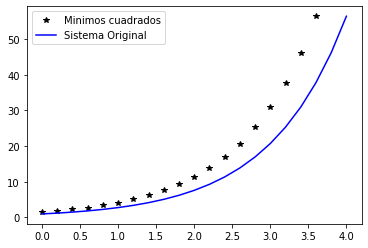

Pesos:  [[ 2.22793446e+00]
 [-1.22938664e+00]
 [ 3.14896650e-07]]


In [ ]:
u_ss = a1 #de las condiciones iniciales de nuestro modelo
itera = len(yd[0])
u1 = np.ones(itera) * u_ss
T = np.zeros([itera-2,3]) 
yti = np.zeros([itera-2,1])
for i in range (2 , itera):
  T[i-2] = [yd[0][i-1] ,yd[0][i-2], u1[i]]  #iteramos los valores hallados en la función escalón anterior
  yti[i-2] = yd[0][i] 
H = np.dot((np.linalg.inv(np.dot(T.T,T))),(np.dot(T.T,yti)))
yt2 = np.dot(T,H)

y_first = np.dot(T,H)-yti
mse = mean_squared_error(y_true = yti, y_pred = y_first) # error medio cuadrático
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

plt.figure()
plt.plot(tdis[0:19],yt2,'k*',label='Minimos cuadrados')
plt.plot(tdis,yd[0],'b', label='Sistema Original')
plt.legend(loc='best')
plt.show()
print("Pesos: ", H)

Así obtenemos los siguientes parámetros

$$y_{k} = 2.228y_{k-1}-1.23y_{k-2}+3.15e-7u_{k-1}$$

obtuvimos un error de 22.51, por lo cual podemos decir que es un buen ajuste a pesar que se realizaron aproximaciones para los valores decimales.

**2.2.  Estimación para función con diferente orden**

tercero $$y_{k} = θ_{1}y_{k-1}+θ_{2}y_{k-2}+θ_{3}u_{k-1}$$ 
cuarto $$y_{k} = θ_{1}y_{k-1}+θ_{2}y_{k-2}+θ_{3}y_{k-3}+θ_{4}u_{k-1}$$ 
quinto $$y_{k} = θ_{1}y_{k-1}+θ_{2}y_{k-2}+θ_{3}y_{k-3}+θ_{4}y_{k-4}+θ_{5}u_{k-1}$$ 
sexto $$y_{k} = θ_{1}y_{k-1}+θ_{2}y_{k-2}+θ_{3}y_{k-3}+θ_{4}y_{k-4}+θ_{5}y_{k-5}+θ_{5}u_{k-1}$$ 

RMSE:  22.512282631371573


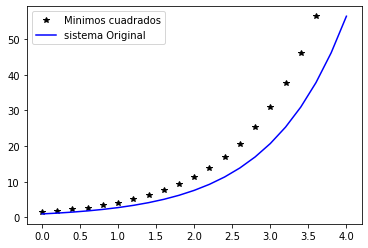

Pesos:  [[ 2.22792816e+00]
 [-1.22937012e+00]
 [-5.82076609e-11]
 [ 3.57627869e-07]]


In [ ]:
#Estimación tercer orden
u_ss = a1
itera = len(yd[0])
u1 = np.ones(itera) * u_ss
T = np.zeros([itera-2,4])
yti = np.zeros([itera-2,1])
for i in range (2 , itera):
  T[i-2] = [yd[0][i-1] ,yd[0][i-2],yd[0][i-3], u1[i]] #Solamente se adiciona un nuevo y a la ecuación
  yti[i-2] = yd[0][i] 
H = np.dot((np.linalg.inv(np.dot(T.T,T))),(np.dot(T.T,yti)))
yt2 = np.dot(T,H)

y_third = np.dot(T,H)-yti
mse = mean_squared_error(y_true = yti, y_pred = y_third) # error medio cuadrático
rmse = np.sqrt(mse)
print("RMSE: ",rmse)  


plt.figure()
plt.plot(tdis[0:19],yt2,'k*',label='Minimos cuadrados')
plt.plot(tdis,yd[0],'b', label='sistema Original')
plt.legend(loc='best')
plt.show()
print("Pesos: ", H)

RMSE:  22.51234413915119


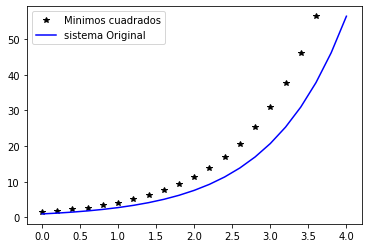

Pesos:  [[ 2.22793843e+00]
 [-1.22938675e+00]
 [-4.16744252e-11]
 [-1.00881591e-10]
 [ 5.14391371e-07]]


In [ ]:
#Estimación cuarto orden
u_ss = a1
itera = len(yd[0])
u1 = np.ones(itera) * u_ss
T = np.zeros([itera-2,5])
yti = np.zeros([itera-2,1])
for i in range (2 , itera):
  T[i-2] = [yd[0][i-1] ,yd[0][i-2],yd[0][i-3],yd[0][i-4], u1[i]] #Solamente se adiciona un nuevo y a la ecuación
  yti[i-2] = yd[0][i] 
H = np.dot((np.linalg.inv(np.dot(T.T,T))),(np.dot(T.T,yti)))
yt3 = np.dot(T,H)

y_fourth = np.dot(T,H)-yti
mse = mean_squared_error(y_true = yti, y_pred = y_fourth) # error medio cuadrático
rmse = np.sqrt(mse)
print("RMSE: ",rmse)  


plt.figure()
plt.plot(tdis[0:19],yt3,'k*',label='Minimos cuadrados')
plt.plot(tdis,yd[0],'b', label='sistema Original')
plt.legend(loc='best')
plt.show()
print("Pesos: ", H)

RMSE:  22.5123493819372


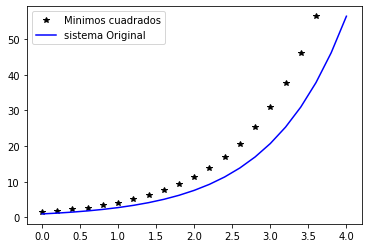

Pesos:  [[ 2.22792576e+00]
 [-1.22937161e+00]
 [-1.67119651e-11]
 [-2.80024892e-11]
 [-8.10729262e-11]
 [ 4.82192263e-07]]


In [ ]:
#Estimación quinto orden
u_ss = a1
itera = len(yd[0])
u1 = np.ones(itera) * u_ss
T = np.zeros([itera-2,6])
yti = np.zeros([itera-2,1])
for i in range (2 , itera):
  T[i-2] = [yd[0][i-1] ,yd[0][i-2],yd[0][i-3],yd[0][i-4],yd[0][i-5], u1[i]] 
  yti[i-2] = yd[0][i] 
H = np.dot((np.linalg.inv(np.dot(T.T,T))),(np.dot(T.T,yti)))
yt2 = np.dot(T,H)

y_fifth = np.dot(T,H)-yti
mse = mean_squared_error(y_true = yti, y_pred = y_fifth) # error medio cuadrático
rmse = np.sqrt(mse)
print("RMSE: ", rmse) 

plt.figure()
plt.plot(tdis[0:19],yt2,'k*',label='Minimos cuadrados')
plt.plot(tdis,yd[0],'b', label='sistema Original')
plt.legend(loc='best')
plt.show()
print("Pesos: ", H)

RMSE:  22.51274236124595


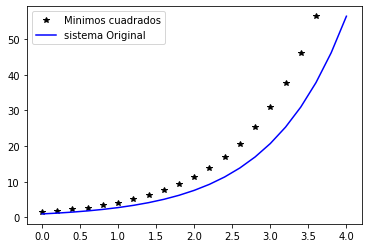

Pesos:  [[ 2.22789310e+00]
 [-1.22935777e+00]
 [-7.34843297e-11]
 [-7.21414040e-11]
 [-8.25437496e-11]
 [-2.29121611e-10]
 [ 8.32369551e-07]]


In [ ]:
#Estimación sextoorden
u_ss = a1
itera = len(yd[0])
u1 = np.ones(itera) * u_ss
T = np.zeros([itera-2,7])
yti = np.zeros([itera-2,1])
for i in range (2 , itera):
  T[i-2] = [yd[0][i-1] ,yd[0][i-2],yd[0][i-3],yd[0][i-4],yd[0][i-5],yd[0][i-6], u1[i]] 
  yti[i-2] = yd[0][i] 
H = np.dot((np.linalg.inv(np.dot(T.T,T))),(np.dot(T.T,yti)))
yt2 = np.dot(T,H)

y_sixth = np.dot(T,H)-yti
mse = mean_squared_error(y_true = yti, y_pred = y_sixth) # error medio cuadrático
rmse = np.sqrt(mse)
print("RMSE: ", rmse) 

plt.figure()
plt.plot(tdis[0:19],yt2,'k*',label='Minimos cuadrados')
plt.plot(tdis,yd[0],'b', label='sistema Original')
plt.legend(loc='best')
plt.show()
print("Pesos: ", H)

Nuestro sistema ajusta para el segundo orden, después la mejora es muy poco significativa. no vale la pena ajustar el modelo a un sistema de mayor orden, esto puede generar mayores errores por propagación de errores.

# **3. Filtro de Kalman para la estimación de parámetros**


RMSE:  22.512415789081825


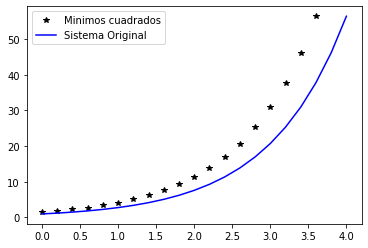

Pesos:  [[ 2.22793446e+00]
 [-1.22938664e+00]
 [ 3.14896650e-07]]


In [ ]:
u_ss = a1 #de las condiciones iniciales de nuestro modelo
itera = len(yd[0])
u1 = np.ones(itera) * u_ss
T = np.zeros([itera-2,3]) 
yti = np.zeros([itera-2,1])
for i in range (2 , itera):
  T[i-2] = [yd[0][i-1] ,yd[0][i-2], u1[i]]  #iteramos los valores hallados en la función escalón anterior
  yti[i-2] = yd[0][i] 
H = np.dot((np.linalg.inv(np.dot(T.T,T))),(np.dot(T.T,yti)))
yt2 = np.dot(T,H)

y_first = np.dot(T,H)-yti
mse = mean_squared_error(y_true = yti, y_pred = y_first) # error medio cuadrático
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

plt.figure()
plt.plot(tdis[0:19],yt2,'k*',label='Minimos cuadrados')
plt.plot(tdis,yd[0],'b', label='Sistema Original')
plt.legend(loc='best')
plt.show()
print("Pesos: ", H)

**3.2. Estimar los parámetros del sistema usando el filtro de Kalman**
Una característica muy atractiva de la metododología que nos ocupa es que tiene carácter recursivo. Una vez que el algoritmo pronostica el nuevo estado en el momento t , añade un término de corrección y el nuevo estado “corregido” sirve como condición inicial en la siguiente etapa, t+1. De esta  forma, la estimación de las variables de estado utiliza toda la información disponible hasta ese momento y no sólo la información hasta la etapa anterior al momento en el cual se realiza la estimación (esto es lo que se conoce como “extracción de señales”).

Este filtro representa el modelo por la media mk y la covarianza Pk. Determinado por medio de una gaussiana multivariada (esto puede generar problemas porque puede ser costoso computacional si tenemos muchos estados). Además hace uso de la propiedad markoviana: dependencia de los datos inmediatamente anteriores P(yk|yk-1, yk-2 ...., kr) = P(yk|yk-1).

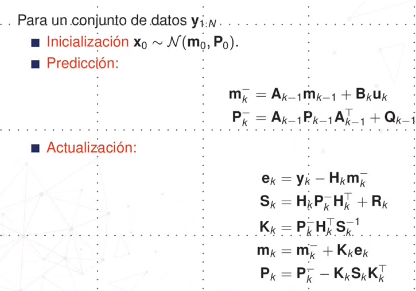

[0.74898081 0.5770506  0.02187705]


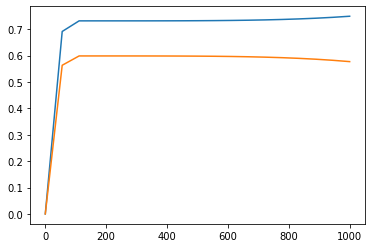

In [ ]:
m_0 = np.array([0,0, 0]) #asumo un estado inicial, pueden ser ceros o cualquier otro
P_0 = np.eye(len(m_0))*100
sigma = 0.025**2 #Error a obtener

N=len(yti)
t = np.linspace(0.0,1000,N)

mk = np.zeros((3,N))
mk1 = m_0
mk[:,0] = m_0
Pk1 = P_0.copy()

#Paso de estimación del filtro de kalman
for i in range(1,N):
  Sk = np.dot(T[i,:],np.dot(Pk1,T[i,:])) + sigma
  Kk = 1.0/Sk*np.dot(Pk1,T[i,:])
  mk[:,i] = mk[:,i-1,]+ Kk*(yti[i]-mk[:,i-1]@T[i,:])
  Pk = Pk1 - Sk * np.outer(Kk,Kk)
  Pk1 = Pk


print(mk[:,-1])  

plt.figure()
plt.plot(t,mk[0,:])
plt.plot(t,mk[1,:])
plt.show()

[ 2.14394360e+00 -1.12679206e+00  1.24357116e-03]


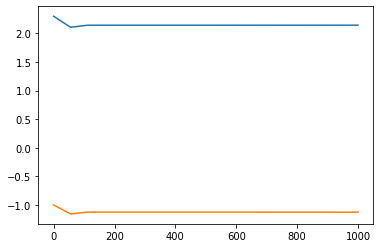

In [ ]:
m_0 = np.array([2.3,-1, 0.25]) #asumo un estado inicial, pueden ser ceros o cualquierr otro
P_0 = np.eye(len(m_0))*100
sigma = 0.025**2 #Error a obtener

N=len(yti)
t = np.linspace(0.0,1000,N)

mk = np.zeros((3,N))
mk1 = m_0
mk[:,0] = m_0
Pk1 = P_0.copy()

#Paso de estimación del filtro de kalman
for i in range(1,N):
  Sk = np.dot(T[i,:],np.dot(Pk1,T[i,:])) + sigma #Probabilidad del xk|yk - posterior
  Kk = 1.0/Sk*np.dot(Pk1,T[i,:])
  mk[:,i] = mk[:,i-1,]+ Kk*(yti[i]-mk[:,i-1]@T[i,:])
  Pk = Pk1 - Sk * np.outer(Kk,Kk)
  Pk1 = Pk


print(mk[:,-1])  

plt.figure()
plt.plot(t,mk[0,:])
plt.plot(t,mk[1,:])
plt.show()

[ 2.14394360e+00 -1.12679206e+00  1.24357116e-03]

[ 2.22793446e+00 -1.22938664e+00  3.14896650e-07]

Los parámetros Θ1 y Θ2 tienen una aproximación cercana.  Tomando solamente 4 cífras significativas podemos asumir que ambas estimaciones son iguales tomando parámetro iniciales muy parecidos a los valores brindados, sin embargo, cuando coloamos valores iniciales alejados, el error va creciendo constantemente. 

Comparado con el punto anterior, el filtro de kalman no necesita todos los datos para hacer estimación, sino que va realiazando la estimación con n cantidad de datos.

El filtro de Kalman nos dará un estimador que minimizará el error
cuadrático medio a partir de unas observaciones

En este algoritmo asumimos el ruido de las observaciones, no nos permite cuantificar la incertidumbre de los datos, para ello se puede utilizar el algoritmo "m", sin embargo, puede presentar ciertos inconvenientes ya que este depende de los valores iniciales que coloquemos, lo mejor es corrrer varias veces el modelo y quedarnos con la mejor aproximación. En este caso, la mejor aproximación está dada por los parámetros cercanos.


